In [ ]:
!pip install ultralytics

In [ ]:
!pip install clearml

In [ ]:
from ultralytics import YOLO
from clearml import Task
from clearml import Dataset

In [ ]:
!pip show accelerate
!pip install git+https://github.com/huggingface/accelerate

In [ ]:
# Basic libraries for data manipulation
import os, re, torch, PIL
import numpy as np

# PyTorch parts
from torch import nn
from torch.optim.lr_scheduler import OneCycleLR
from torch.utils.data import DataLoader, Dataset
from torchvision.models import resnet34
from torchvision.transforms import Compose, RandomResizedCrop, Resize, ToTensor

# Accelerate parts
from accelerate import Accelerator, notebook_launcher # main interface, distributed launcher
from accelerate.utils import set_seed # reproducability across devices

In [ ]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=FJSMC571UPBMBDQWZT5J
%env CLEARML_API_SECRET_KEY=YgNyFQExU1xwqGsCGs9mWFYM9uedsNta1CZPGWgXuioLQ9Ngcm
#!clearml-init



In [ ]:
# dataset_name = "Dataset_for_YOLO"
# dataset_project = "Variant0.1"

from clearml import Dataset

dataset = Dataset.get(dataset_id='4b1238c811244b8588510687832ad98f')
dataset.get_mutable_local_copy(target_folder='Dataset_for_YOLO')


In [ ]:
task = Task.init(project_name="Variant0.1", task_name="YOLOv8n_training_0.1")


Ultralytics YOLOv8.0.200 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=Dataset_for_YOLO/data.yaml, epochs=20, patience=10, batch=70, imgsz=608, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=4, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=Fa

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/working/Dataset_for_YOLO/train/labels... 8580 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8580/8580 [00:07<00:00, 1126.01it/s]
train: New cache created: /kaggle/working/Dataset_for_YOLO/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/working/Dataset_for_YOLO/val/labels... 2088 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2088/2088 [00:01<00:00, 1371.80it/s]
val: New cache created: /kaggle/working/Dataset_for_YOLO/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) w

2023-10-24 11:45:33,768 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/Variant0.1/YOLOv8n_training_0.1.e652ed3cd29840dbaed88c15a8a46e83/models/best.pt


lr/pg0,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg1,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
lr/pg2,▃▆███▇▇▆▆▅▅▅▄▄▃▃▂▂▁▁
metrics/mAP50(B),▁▅▆▇▇▇▇█████████████
metrics/mAP50-95(B),▁▃▄▅▅▅▅▆▆▆▆▇▇▇▇▇▇███
metrics/precision(B),▁▄▅▆▆▇▇▇▇███████████
metrics/recall(B),▁▄▆▆▇▆▇▇▇███████████
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▄▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁


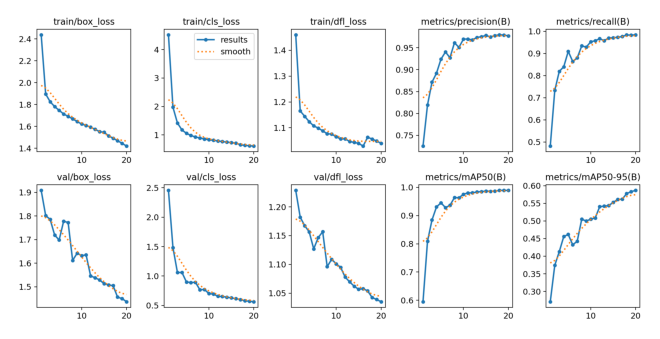

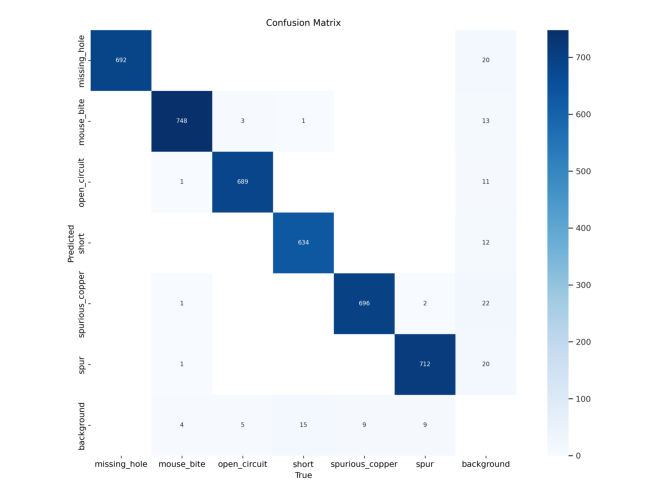

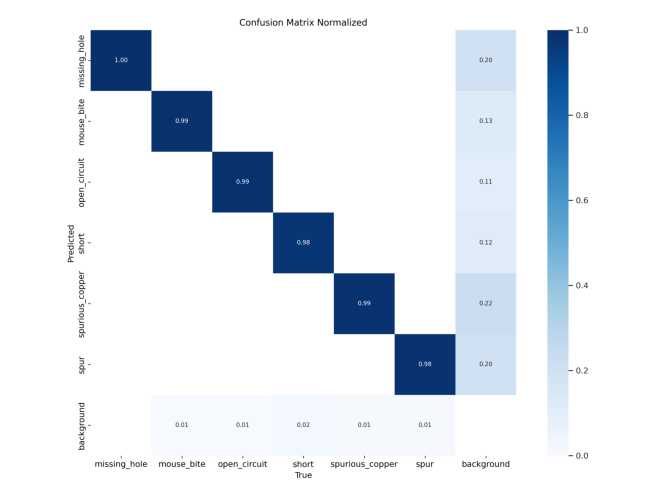

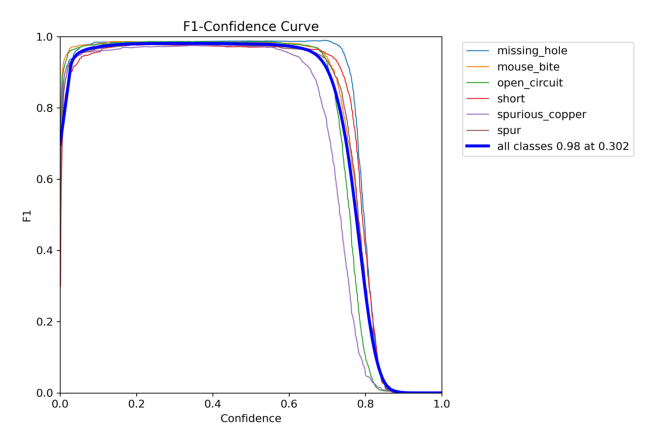

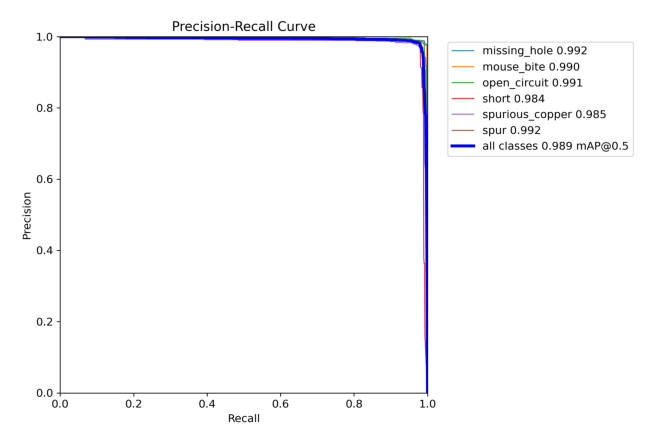

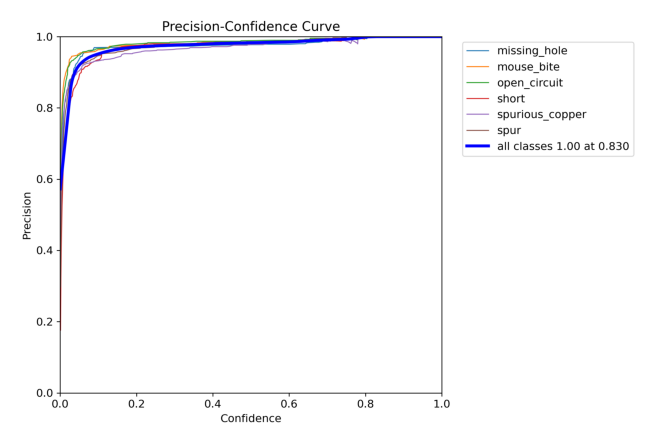

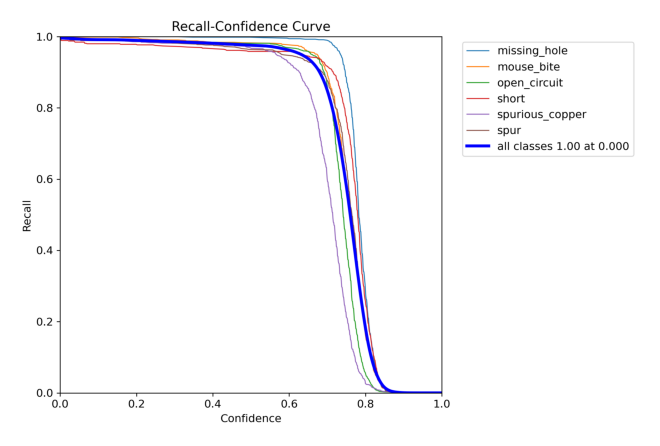

In [ ]:
imgsz = 608
epochs = 20
batch = 70
patience = 10
close_mosaic = int(epochs/5)
model_variant = "yolov8n"

task.set_parameter("model_variant", model_variant)
args = dict(data='Dataset_for_YOLO/data.yaml',
            epochs=epochs,
            imgsz=imgsz,
            batch=batch,
            patience=patience,
            close_mosaic=close_mosaic)
            #device=[0,1])

model = YOLO(f'{model_variant}.pt')
task.connect(args)

# Train the model
# If running remotely, the arguments may be overridden by ClearML if they were changed in the UI
results = model.train(**args)

In [ ]:
task.close()

In [ ]:
# model = YOLO("runs/detect/train2/weights/best.pt")

In [ ]:
# pre = model.predict(
#    source="test",
#    show=True,
#    imgsz=608,
#    hide_labels=True,
#    save=True,
#    name="val_pred",
#    conf=0.1,
#    )